In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
test = pd.read_csv("pml-testing.csv")
train = pd.read_csv("pml-training.csv")
train.head()

/home/user/anaconda3/envs/tensorflow/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (11,14,19,22,25,70,73,86,87,89,90,94,97,100) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,user_name,raw_timestamp_part_1,raw_timestamp_part_2,cvtd_timestamp,new_window,num_window,roll_belt,pitch_belt,yaw_belt,...,gyros_forearm_x,gyros_forearm_y,gyros_forearm_z,accel_forearm_x,accel_forearm_y,accel_forearm_z,magnet_forearm_x,magnet_forearm_y,magnet_forearm_z,classe
0,1,carlitos,1323084231,788290,05/12/2011 11:23,no,11,1.41,8.07,-94.4,...,0.03,0.00,-0.02,192,203,-215,-17,654.0,476.0,A
1,2,carlitos,1323084231,808298,05/12/2011 11:23,no,11,1.41,8.07,-94.4,...,0.02,0.00,-0.02,192,203,-216,-18,661.0,473.0,A
2,3,carlitos,1323084231,820366,05/12/2011 11:23,no,11,1.42,8.07,-94.4,...,0.03,-0.02,0.00,196,204,-213,-18,658.0,469.0,A
3,4,carlitos,1323084232,120339,05/12/2011 11:23,no,12,1.48,8.05,-94.4,...,0.02,-0.02,0.00,189,206,-214,-16,658.0,469.0,A
4,5,carlitos,1323084232,196328,05/12/2011 11:23,no,12,1.48,8.07,-94.4,...,0.02,0.00,-0.02,189,206,-214,-17,655.0,473.0,A


In [2]:
train2 = train.drop(['Unnamed: 0', 'user_name','raw_timestamp_part_1','raw_timestamp_part_2','cvtd_timestamp','new_window','num_window'], axis=1)

In [3]:
train2 = train2.dropna(axis=1, how='any')

In [4]:
train2.columns

Index(['roll_belt', 'pitch_belt', 'yaw_belt', 'total_accel_belt',
       'gyros_belt_x', 'gyros_belt_y', 'gyros_belt_z', 'accel_belt_x',
       'accel_belt_y', 'accel_belt_z', 'magnet_belt_x', 'magnet_belt_y',
       'magnet_belt_z', 'roll_arm', 'pitch_arm', 'yaw_arm', 'total_accel_arm',
       'gyros_arm_x', 'gyros_arm_y', 'gyros_arm_z', 'accel_arm_x',
       'accel_arm_y', 'accel_arm_z', 'magnet_arm_x', 'magnet_arm_y',
       'magnet_arm_z', 'roll_dumbbell', 'pitch_dumbbell', 'yaw_dumbbell',
       'total_accel_dumbbell', 'gyros_dumbbell_x', 'gyros_dumbbell_y',
       'gyros_dumbbell_z', 'accel_dumbbell_x', 'accel_dumbbell_y',
       'accel_dumbbell_z', 'magnet_dumbbell_x', 'magnet_dumbbell_y',
       'magnet_dumbbell_z', 'roll_forearm', 'pitch_forearm', 'yaw_forearm',
       'total_accel_forearm', 'gyros_forearm_x', 'gyros_forearm_y',
       'gyros_forearm_z', 'accel_forearm_x', 'accel_forearm_y',
       'accel_forearm_z', 'magnet_forearm_x', 'magnet_forearm_y',
       'magnet_forea

In [5]:
train2 = pd.get_dummies(data=train2, columns=["classe"])
train2[0:3]

,roll_belt,pitch_belt,yaw_belt,total_accel_belt,gyros_belt_x,gyros_belt_y,gyros_belt_z,accel_belt_x,accel_belt_y,accel_belt_z,...,accel_forearm_y,accel_forearm_z,magnet_forearm_x,magnet_forearm_y,magnet_forearm_z,classe_A,classe_B,classe_C,classe_D,classe_E
0,1.41,8.07,-94.4,3,0.00,0.0,-0.02,-21,4,22,...,203,-215,-17,654.0,476.0,1,0,0,0,0
1,1.41,8.07,-94.4,3,0.02,0.0,-0.02,-22,4,22,...,203,-216,-18,661.0,473.0,1,0,0,0,0
2,1.42,8.07,-94.4,3,0.00,0.0,-0.02,-20,5,23,...,204,-213,-18,658.0,469.0,1,0,0,0,0


In [6]:
msk = np.random.rand(len(train2)) < 0.8
train_df = train2[msk]
test_df = train2[~msk]

nparray_train = train_df.values
nparray_test = test_df.values
nparray_train.shape
nparray_test.shape

(3931, 57)

In [7]:
# from sklearn import preprocessing
# # 正規化
# minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1))
# nparray_train=minmax_scale.fit_transform(nparray_train)
# nparray_test=minmax_scale.fit_transform(nparray_test)

In [8]:
len(nparray_train)

15691

In [9]:
nb_features = 13
X_train_r = np.zeros((len(nparray_train), nb_features, 4))
X_train_r[:, :, 0] = nparray_train[:, :13]
X_train_r[:, :, 1] = nparray_train[:, 13:26]
X_train_r[:, :, 2] = nparray_train[:, 26:39]
X_train_r[:, :, 3] = nparray_train[:, 39:52]

In [10]:
nb_features = 13
X_valid_r  = np.zeros((len(nparray_test), nb_features, 4))
X_valid_r [:, :, 0] = nparray_test[:, :13]
X_valid_r [:, :, 1] = nparray_test[:, 13:26]
X_valid_r [:, :, 2] = nparray_test[:, 26:39]
X_valid_r [:, :, 3] = nparray_test[:, 39:52]

In [11]:
train_label = nparray_train[:,52:57]
test_label = nparray_test[:,52:57]

In [12]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv1D,BatchNormalization,Flatten,Activation,MaxPooling1D
from keras.callbacks import TensorBoard, EarlyStopping, ModelCheckpoint
from keras.optimizers import SGD, Adam


model = Sequential()
# model.add(Conv1D(nb_filter=64, filter_length=3, input_shape=(nb_features, 4), activation = 'relu'))
# model.add(MaxPooling1D(pool_size=2))
# model.add(Conv1D(nb_filter=32, filter_length=3, activation = 'relu'))
# model.add(MaxPooling1D(pool_size=2))
# epoch 50 0.93

# model.add(Conv1D(nb_filter=64, filter_length=3, input_shape=(nb_features, 4), activation = 'relu'))
# model.add(Dropout(0.2))
# model.add(Conv1D(nb_filter=32, filter_length=1, activation = 'relu'))
# model.add(Dropout(0.2))
# epoch 50 0.84

# model.add(Conv1D(nb_filter=64, filter_length=3, input_shape=(nb_features, 4), activation = 'relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling1D(pool_size=2))
# model.add(Conv1D(nb_filter=32, filter_length=3, activation = 'relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling1D(pool_size=2))
# epoch 50 0.9577

# model.add(Conv1D(nb_filter=128, filter_length=3, activation = 'relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling1D(pool_size=2))
# model.add(Conv1D(nb_filter=64, filter_length=3, activation = 'relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling1D(pool_size=2))
# epoch 50 0.9586 

# model.add(Conv1D(nb_filter=256, filter_length=3, activation = 'relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling1D(pool_size=2))
# model.add(Conv1D(nb_filter=128, filter_length=3, activation = 'relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling1D(pool_size=2))
# epoch 50 0.9597

# model.add(Conv1D(nb_filter=512, filter_length=3, activation = 'relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling1D(pool_size=2))
# model.add(Conv1D(nb_filter=256, filter_length=3, activation = 'relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling1D(pool_size=2))
# epoch 50 0.9537

model.add(Conv1D(nb_filter=512, filter_length=3,input_shape=(nb_features, 4), activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(nb_filter=128, filter_length=3, activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
# epoch 50 0.9617   epoch 300 0.9695


# model.add(Conv1D(nb_filter=1024, filter_length=3, activation = 'relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling1D(pool_size=2))
# model.add(Conv1D(nb_filter=128, filter_length=3, activation = 'relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling1D(pool_size=2))
# epoch 50 0.9606

# model.add(Conv1D(nb_filter=512, filter_length=3, activation = 'relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling1D(pool_size=2))
# model.add(Conv1D(nb_filter=64, filter_length=3, activation = 'relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling1D(pool_size=2))
# epoch 50 0.9556

model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dense(5, activation='softmax'))
print(model.summary())  



Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 11, 512)           6656      
_________________________________________________________________
batch_normalization_1 (Batch (None, 11, 512)           2048      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 5, 512)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 3, 128)            196736    
_________________________________________________________________
batch_normalization_2 (Batch (None, 3, 128)            512       
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 1, 128)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 128)               0         
__________

/home/user/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:52: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(input_shape=(13, 4), activation="relu", filters=512, kernel_size=3)`
/home/user/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:55: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=128, kernel_size=3)`


In [13]:
# sgd = SGD(lr=0.01, nesterov=True, decay=1e-6, momentum=0.9)
adam = Adam(lr=0.002, beta_1=0.5)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
checkpoint = ModelCheckpoint('weights.best.hdf5', monitor='val_acc', verbose=1, save_best_only=True, mode='max')

In [14]:
train_history = model.fit(x=X_train_r, y=train_label, validation_split=0.1, epochs=300, batch_size=128,verbose=2)

Train on 14121 samples, validate on 1570 samples
Epoch 1/300
 - 2s - loss: 0.3182 - acc: 0.8638 - val_loss: 0.8753 - val_acc: 0.6972
Epoch 2/300
 - 2s - loss: 0.1981 - acc: 0.9205 - val_loss: 0.7994 - val_acc: 0.7115
Epoch 3/300
 - 2s - loss: 0.1598 - acc: 0.9363 - val_loss: 0.8852 - val_acc: 0.7127
Epoch 4/300
 - 2s - loss: 0.1317 - acc: 0.9478 - val_loss: 0.9075 - val_acc: 0.7055
Epoch 5/300
 - 2s - loss: 0.1246 - acc: 0.9504 - val_loss: 1.1017 - val_acc: 0.6836
Epoch 6/300
 - 2s - loss: 0.1097 - acc: 0.9561 - val_loss: 1.0433 - val_acc: 0.7054
Epoch 7/300
 - 2s - loss: 0.1001 - acc: 0.9598 - val_loss: 1.0409 - val_acc: 0.7093
Epoch 8/300
 - 2s - loss: 0.0923 - acc: 0.9637 - val_loss: 0.9263 - val_acc: 0.7181
Epoch 9/300
 - 2s - loss: 0.0865 - acc: 0.9659 - val_loss: 1.1253 - val_acc: 0.7103
Epoch 10/300
 - 2s - loss: 0.0841 - acc: 0.9661 - val_loss: 1.2721 - val_acc: 0.6917
Epoch 11/300
 - 2s - loss: 0.0774 - acc: 0.9693 - val_loss: 1.2562 - val_acc: 0.7022
Epoch 12/300
 - 2s - loss

Epoch 97/300
 - 2s - loss: 0.0162 - acc: 0.9936 - val_loss: 2.1169 - val_acc: 0.7006
Epoch 98/300
 - 2s - loss: 0.0120 - acc: 0.9958 - val_loss: 2.1142 - val_acc: 0.7186
Epoch 99/300
 - 2s - loss: 0.0136 - acc: 0.9947 - val_loss: 1.9105 - val_acc: 0.7403
Epoch 100/300
 - 2s - loss: 0.0182 - acc: 0.9935 - val_loss: 2.1765 - val_acc: 0.7136
Epoch 101/300
 - 2s - loss: 0.0208 - acc: 0.9924 - val_loss: 2.1322 - val_acc: 0.7130
Epoch 102/300
 - 2s - loss: 0.0138 - acc: 0.9947 - val_loss: 1.9716 - val_acc: 0.7294
Epoch 103/300
 - 2s - loss: 0.0209 - acc: 0.9927 - val_loss: 2.0919 - val_acc: 0.7227
Epoch 104/300
 - 2s - loss: 0.0188 - acc: 0.9928 - val_loss: 2.1076 - val_acc: 0.7209
Epoch 105/300
 - 2s - loss: 0.0138 - acc: 0.9948 - val_loss: 2.2998 - val_acc: 0.7097
Epoch 106/300
 - 2s - loss: 0.0126 - acc: 0.9953 - val_loss: 2.0415 - val_acc: 0.7173
Epoch 107/300
 - 2s - loss: 0.0153 - acc: 0.9946 - val_loss: 2.0348 - val_acc: 0.7197
Epoch 108/300
 - 2s - loss: 0.0138 - acc: 0.9952 - val_lo

Epoch 193/300
 - 2s - loss: 0.0070 - acc: 0.9975 - val_loss: 2.5661 - val_acc: 0.7245
Epoch 194/300
 - 2s - loss: 0.0091 - acc: 0.9967 - val_loss: 2.5721 - val_acc: 0.7273
Epoch 195/300
 - 2s - loss: 0.0100 - acc: 0.9966 - val_loss: 2.3719 - val_acc: 0.7252
Epoch 196/300
 - 2s - loss: 0.0119 - acc: 0.9957 - val_loss: 2.3199 - val_acc: 0.7392
Epoch 197/300
 - 2s - loss: 0.0087 - acc: 0.9969 - val_loss: 2.3655 - val_acc: 0.7324
Epoch 198/300
 - 2s - loss: 0.0073 - acc: 0.9974 - val_loss: 2.4811 - val_acc: 0.7255
Epoch 199/300
 - 2s - loss: 0.0095 - acc: 0.9964 - val_loss: 2.5110 - val_acc: 0.7236
Epoch 200/300
 - 2s - loss: 0.0100 - acc: 0.9963 - val_loss: 2.6865 - val_acc: 0.7190
Epoch 201/300
 - 2s - loss: 0.0100 - acc: 0.9967 - val_loss: 2.4667 - val_acc: 0.7273
Epoch 202/300
 - 2s - loss: 0.0114 - acc: 0.9960 - val_loss: 2.6762 - val_acc: 0.7185
Epoch 203/300
 - 2s - loss: 0.0120 - acc: 0.9954 - val_loss: 2.5515 - val_acc: 0.7227
Epoch 204/300
 - 2s - loss: 0.0097 - acc: 0.9966 - val

Epoch 289/300
 - 2s - loss: 0.0101 - acc: 0.9964 - val_loss: 2.5855 - val_acc: 0.7345
Epoch 290/300
 - 2s - loss: 0.0078 - acc: 0.9974 - val_loss: 2.8453 - val_acc: 0.7073
Epoch 291/300
 - 2s - loss: 0.0048 - acc: 0.9985 - val_loss: 2.4242 - val_acc: 0.7425
Epoch 292/300
 - 2s - loss: 0.0045 - acc: 0.9984 - val_loss: 2.6370 - val_acc: 0.7254
Epoch 293/300
 - 2s - loss: 0.0051 - acc: 0.9984 - val_loss: 2.6660 - val_acc: 0.7177
Epoch 294/300
 - 2s - loss: 0.0043 - acc: 0.9986 - val_loss: 2.5242 - val_acc: 0.7313
Epoch 295/300
 - 2s - loss: 0.0063 - acc: 0.9976 - val_loss: 2.6509 - val_acc: 0.7306
Epoch 296/300
 - 2s - loss: 0.0068 - acc: 0.9975 - val_loss: 2.8714 - val_acc: 0.7129
Epoch 297/300
 - 2s - loss: 0.0063 - acc: 0.9980 - val_loss: 2.8297 - val_acc: 0.7126
Epoch 298/300
 - 2s - loss: 0.0066 - acc: 0.9978 - val_loss: 2.6756 - val_acc: 0.7237
Epoch 299/300
 - 2s - loss: 0.0053 - acc: 0.9981 - val_loss: 2.6529 - val_acc: 0.7290
Epoch 300/300
 - 2s - loss: 0.0073 - acc: 0.9975 - val

In [15]:
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title("Train History")
    plt.ylabel("train")
    plt.xlabel("Epoch")
    plt.legend(["train", "validation"], loc="center right")
    plt.show()

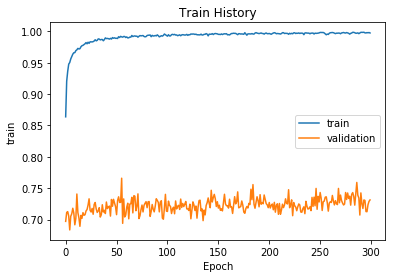

In [16]:
show_train_history(train_history, "acc", "val_acc")

In [17]:
score = model.evaluate(x=X_valid_r,y=test_label)

3931/3931 [==============================] - 0s 59us/step


In [18]:
score[1]

0.9686084989372085

In [19]:
test = test[['roll_belt','pitch_belt', 'yaw_belt', 'total_accel_belt',
       'gyros_belt_x', 'gyros_belt_y', 'gyros_belt_z', 'accel_belt_x',
       'accel_belt_y', 'accel_belt_z', 'magnet_belt_x', 'magnet_belt_y',
       'magnet_belt_z', 'roll_arm', 'pitch_arm', 'yaw_arm', 'total_accel_arm',
       'gyros_arm_x', 'gyros_arm_y', 'gyros_arm_z', 'accel_arm_x',
       'accel_arm_y', 'accel_arm_z', 'magnet_arm_x', 'magnet_arm_y',
       'magnet_arm_z', 'roll_dumbbell', 'pitch_dumbbell', 'yaw_dumbbell',
       'total_accel_dumbbell', 'gyros_dumbbell_x', 'gyros_dumbbell_y',
       'gyros_dumbbell_z', 'accel_dumbbell_x', 'accel_dumbbell_y',
       'accel_dumbbell_z', 'magnet_dumbbell_x', 'magnet_dumbbell_y',
       'magnet_dumbbell_z', 'roll_forearm', 'pitch_forearm', 'yaw_forearm',
       'total_accel_forearm', 'gyros_forearm_x', 'gyros_forearm_y',
       'gyros_forearm_z', 'accel_forearm_x', 'accel_forearm_y',
       'accel_forearm_z', 'magnet_forearm_x', 'magnet_forearm_y',
       'magnet_forearm_z']]

In [20]:
test = test.values
nb_features = 13
X_test_r  = np.zeros((len(test), nb_features, 4))
X_test_r [:, :, 0] = test[:, :13]
X_test_r [:, :, 1] = test[:, 13:26]
X_test_r [:, :, 2] = test[:, 26:39]
X_test_r [:, :, 3] = test[:, 39:52]

In [21]:
predict = model.predict(X_test_r)
predict = [np.argmax(predict)for predict in predict]
print(predict)
dict1 = {0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E'}

[1, 0, 1, 0, 0, 2, 3, 1, 0, 0, 1, 2, 1, 0, 2, 4, 0, 1, 1, 1]


In [24]:
print('The accuracy of CNN is',score[1])
list2 = []
for i in range(len(predict)):
    u = dict1[(predict[i])]
    list2.append(dict1[(predict[i])])
print(list2)

The accuracy of CNN is 0.9686084989372085
['B', 'A', 'B', 'A', 'A', 'C', 'D', 'B', 'A', 'A', 'B', 'C', 'B', 'A', 'C', 'E', 'A', 'B', 'B', 'B']
